https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [169]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('data/temps.csv')
features_out = ['forecast_noaa', 'forecast_acc', 'forecast_under']
features = features.drop(columns=features_out)
# Actual column is the target
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### 2. Lidia con las variables categóricas del dataset

In [170]:
# One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(features, drop_first=True) # Evitar la colinearidad de los datos
features = pd.get_dummies(features, drop_first=True)


# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,0,0,0,0,0,0
1,45.7,44,61,0,1,0,0,0,0
2,45.8,41,56,0,0,1,0,0,0
3,45.9,40,53,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,1,0


### 3. Divide en train y test

In [171]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features 
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [172]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [173]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [157]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 13)
Training Labels Shape: (261,)
Testing Features Shape: (87, 13)
Testing Labels Shape: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_leaf=10)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(min_samples_leaf=10)

### 5. Calcula su MAE
Sin usar sklearn

In [135]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.12 degrees.


In [136]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.1 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [137]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('MAPE:', round(accuracy, 2), '%.')

MAPE: 93.66 %.


### 7. Representa el árbol de decision

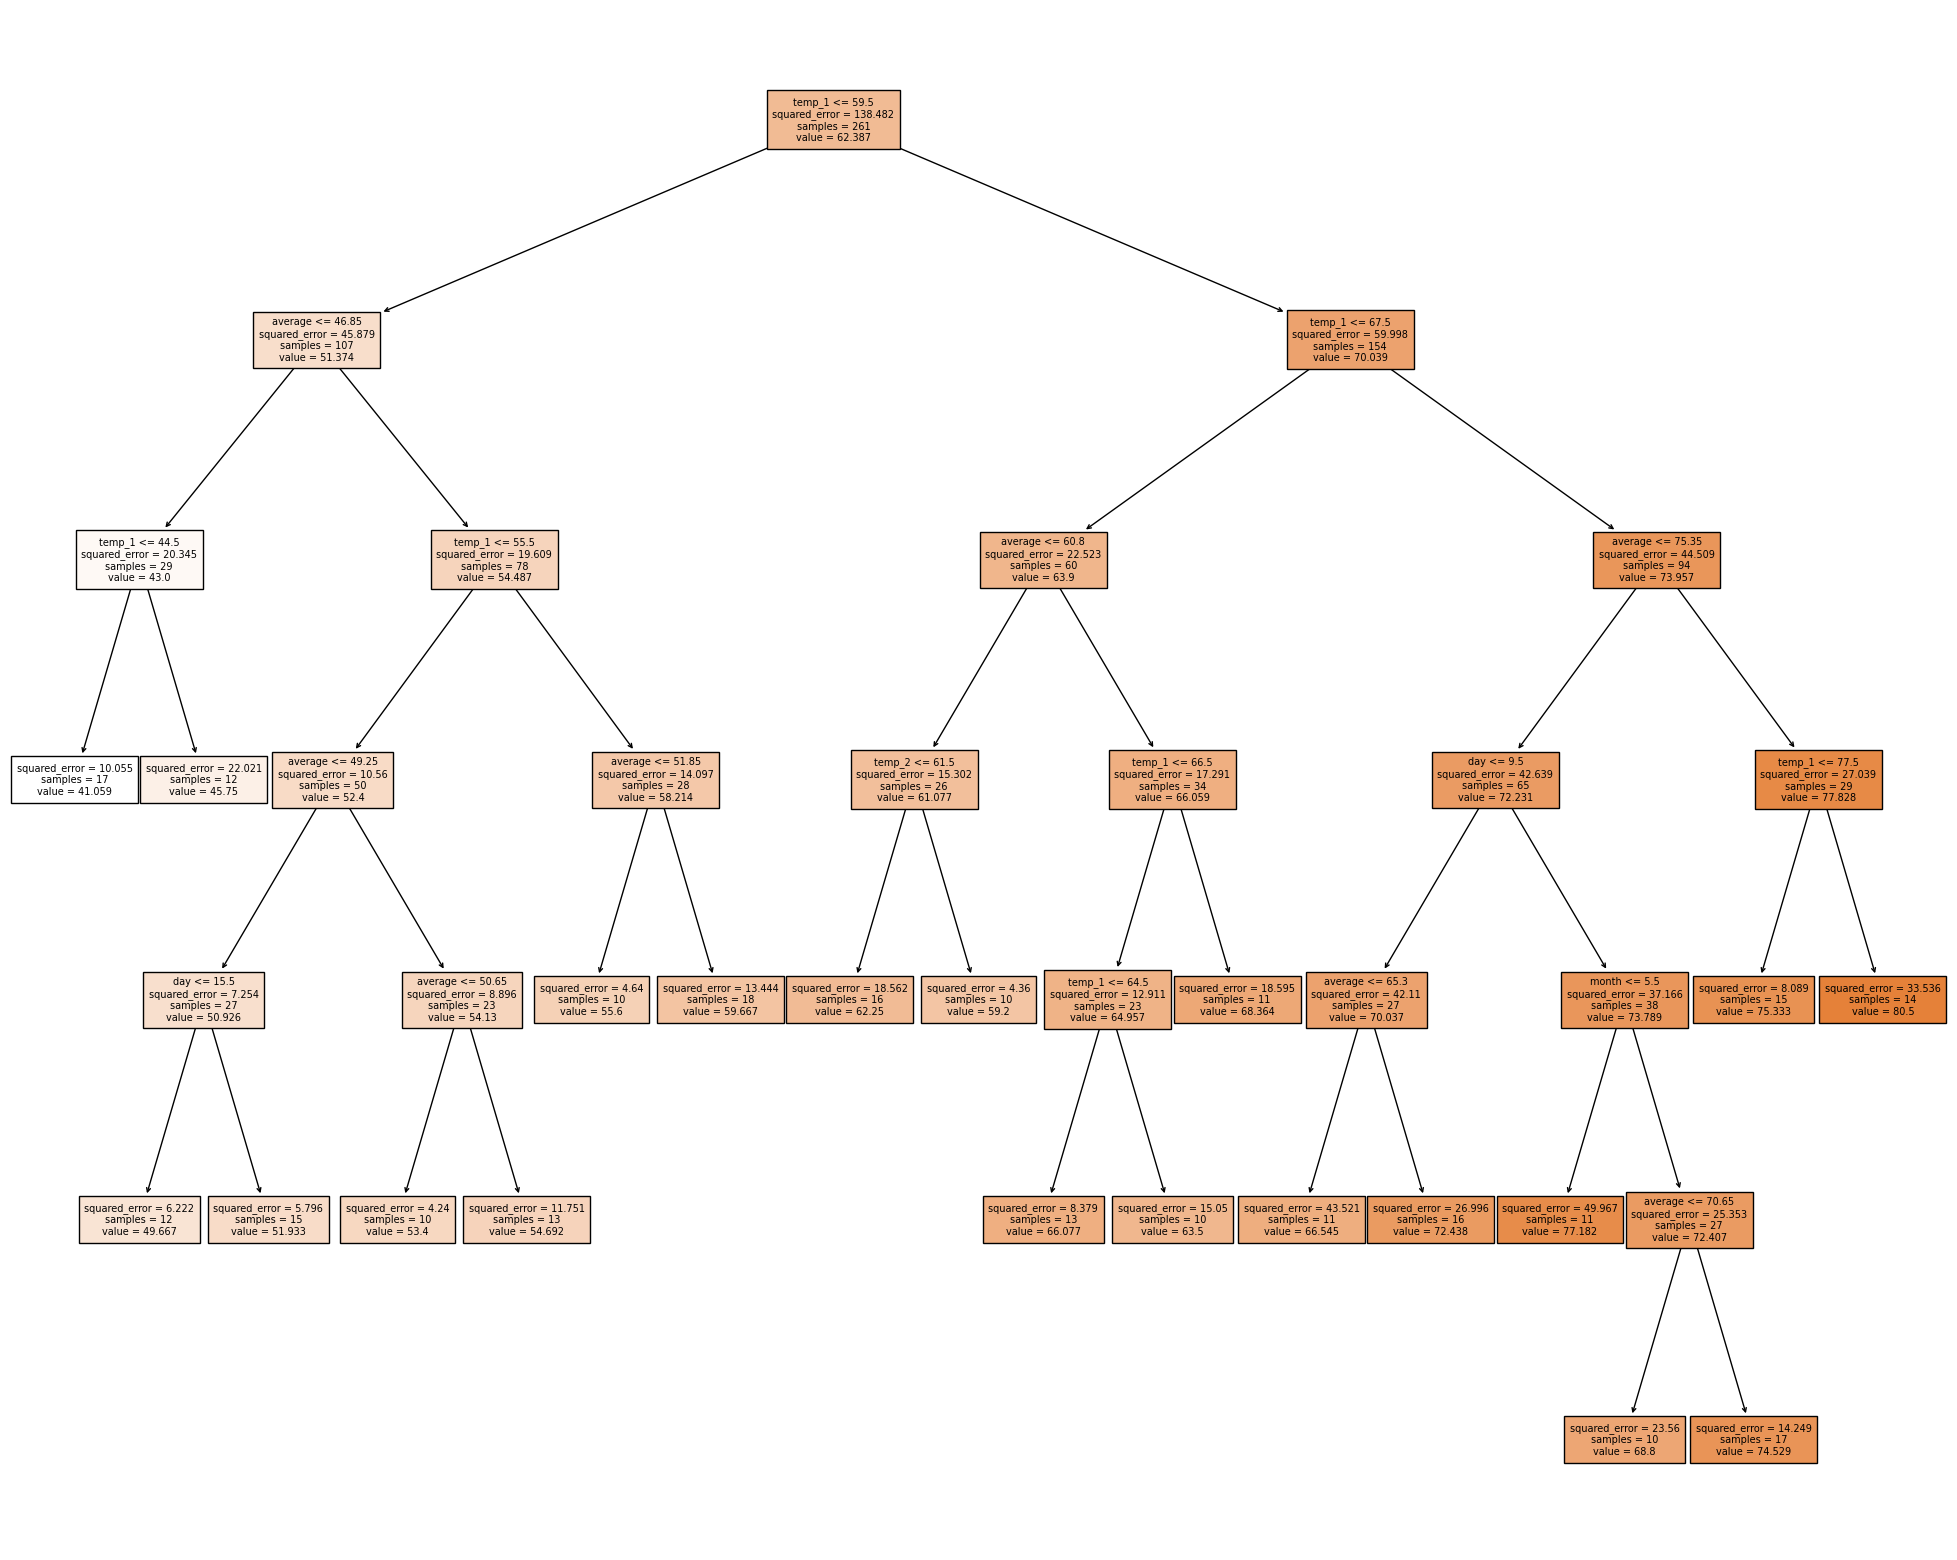

In [138]:
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True,
               fontsize=7);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [139]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [140]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.71 degrees.


In [141]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.11 degrees.


### 10. Vuelve a representar su árbol

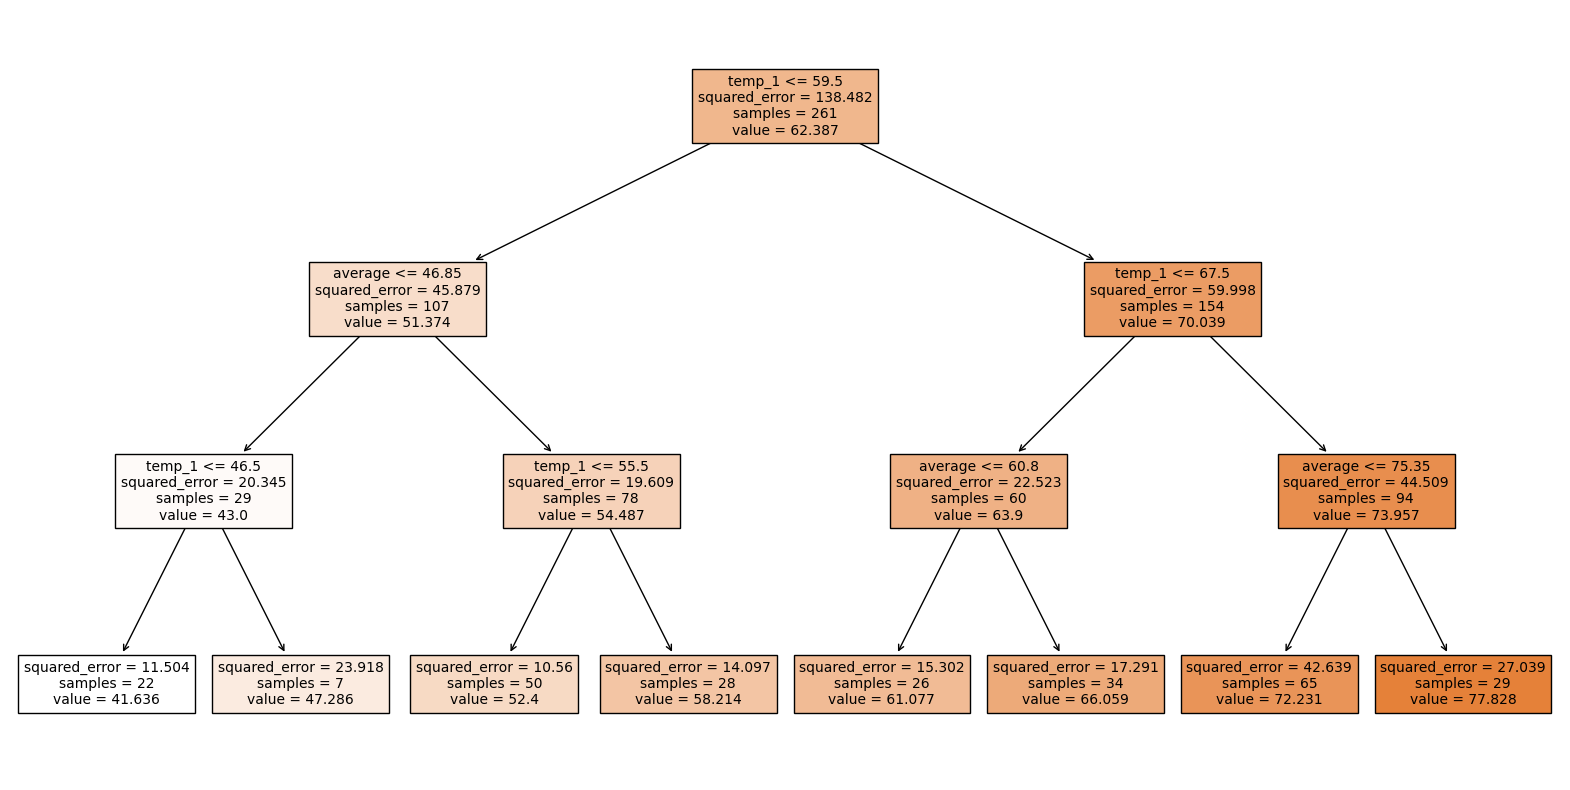

In [142]:
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True,
               fontsize=10);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [143]:
dtr.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.87496778,
       0.12503222, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [144]:
dtr.feature_importances_
feature_list

import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
df_imp = pd.DataFrame(import_dict).sort_values('importance', ascending=False)
df_imp

,features,importance
4,temp_1,0.874968
5,average,0.125032
0,year,0.000000
1,month,0.000000
2,day,0.000000
3,temp_2,0.000000
6,friend,0.000000
7,week_Mon,0.000000
8,week_Sat,0.000000
9,week_Sun,0.000000


<AxesSubplot: ylabel='features'>

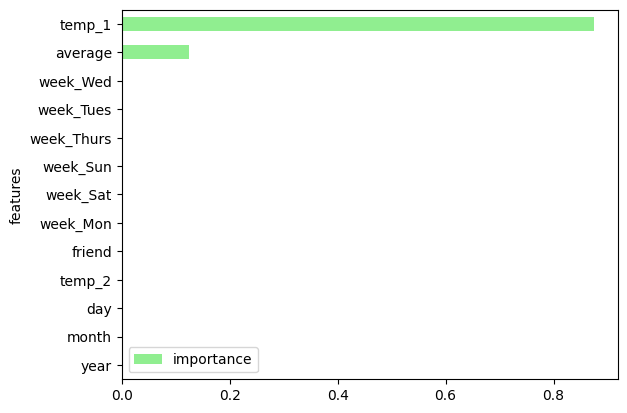

In [145]:
df_imp.set_index('features').sort_values(by='importance').plot(kind='barh', color='lightgreen')

In [146]:
feature_list.index('temp_1')

4

In [147]:
from sklearn.tree import DecisionTreeRegressor

idx_temp_1 = feature_list.index('temp_1')
# test_features
dtr = DecisionTreeRegressor(max_depth=3)
train_features = np.hstack([train_features[:, :idx_temp_1], train_features[:, idx_temp_1+1:]])
dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

In [148]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.95 degrees.


In [149]:
test_features = np.hstack([test_features[:, :idx_temp_1], test_features[:, idx_temp_1+1:]])

# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.47 degrees.


In [150]:
dtr.feature_importances_
feature_list

import_dict = {'features': feature_list[:idx_temp_1] + feature_list[idx_temp_1+1:],
              'importance': dtr.feature_importances_}
df_imp = pd.DataFrame(import_dict).sort_values('importance', ascending=False)
df_imp

,features,importance
4,average,0.969697
1,month,0.026306
2,day,0.003998
0,year,0.000000
3,temp_2,0.000000
5,friend,0.000000
6,week_Mon,0.000000
7,week_Sat,0.000000
8,week_Sun,0.000000
9,week_Thurs,0.000000


<AxesSubplot: ylabel='features'>

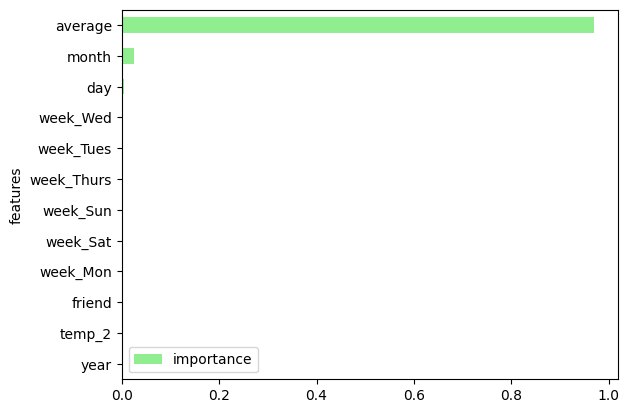

In [151]:
df_imp.set_index('features').sort_values(by='importance').plot(kind='barh', color='lightgreen')

In [174]:
from sklearn.ensemble import RandomForestRegressor
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


idx_temp_1 = feature_list.index('temp_1')
# test_features
dtr = RandomForestRegressor(max_depth=3, n_estimators=150, random_state=0, max_features=3)
train_features = np.hstack([train_features[:, :idx_temp_1], train_features[:, idx_temp_1+1:]])
dtr.fit(train_features, train_labels)

RandomForestRegressor(max_depth=3, max_features=3, n_estimators=150,
                      random_state=0)

In [175]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.37 degrees.


In [176]:
test_features = np.hstack([test_features[:, :idx_temp_1], test_features[:, idx_temp_1+1:]])

# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.66 degrees.


In [177]:
import_dict = {'features': feature_list[:idx_temp_1] + feature_list[idx_temp_1+1:],
              'importance': dtr.feature_importances_}
df_imp = pd.DataFrame(import_dict).sort_values('importance', ascending=False)
df_imp

,features,importance
4,average,0.409975
3,temp_2,0.243088
5,friend,0.159646
1,month,0.159047
2,day,0.015201
11,week_Wed,0.003820
7,week_Sat,0.002834
8,week_Sun,0.001829
10,week_Tues,0.001776
9,week_Thurs,0.001539


<AxesSubplot: ylabel='features'>

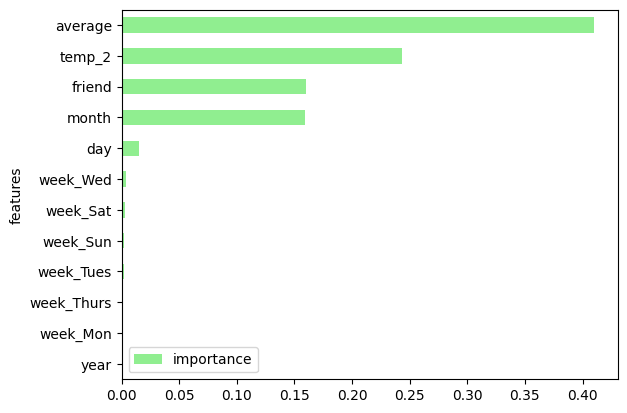

In [178]:
df_imp.set_index('features').sort_values(by='importance').plot(kind='barh', color='lightgreen')